In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORT PACKAGES**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/FastagFraudDetection.csv')
data

Transaction_ID        Timestamp Vehicle_Type         FastagID  \
0                  1   1/6/2023 11:20         Bus   FTG-001-ABC-121   
1                  2   1/7/2023 14:55          Car  FTG-002-XYZ-451   
2                  3   1/8/2023 18:25   Motorcycle              NaN   
3                  4    1/9/2023 2:05        Truck  FTG-044-LMN-322   
4                  5   1/10/2023 6:35          Van  FTG-505-DEF-652   
...              ...              ...          ...              ...   
4995            4996   1/1/2023 22:18        Truck  FTG-445-EDC-765   
4996            4997  1/17/2023 13:43          Van  FTG-446-LMK-432   
4997            4998    2/5/2023 5:08        Sedan  FTG-447-PLN-109   
4998            4999  2/20/2023 20:34          SUV  FTG-458-VFR-876   
4999            5000   3/10/2023 0:59         Bus   FTG-459-WSX-543   

     TollBoothID Lane_Type Vehicle_Dimensions  Transaction_Amount  \
0          A-101   Express              Large                 350   
1          B-102   Regular              Small                 120   
2          D-104   Regular              Small                   0   
3          C-103   Regular              Large                 350   
4          B-102   Express             Medium                 140   
...          ...       ...                ...                 ...   
4995       C-103   Regular              Large                 330   
4996       B-102   Express             Medium                 125   
4997       A-101   Regular             Medium                 115   
4998       B-102   Express              Large                 145   
4999       C-103   Regular              Large                 330   

      Amount_paid                  Geographical_Location  Vehicle_Speed  \
0             120  13.059816123454882, 77.77068662374292             65   
1             100  13.059816123454882, 77.77068662374292             78   
2               0  13.059816123454882, 77.77068662374292             53   
3             120  13.059816123454882, 77.77068662374292             92   
4             100  13.059816123454882, 77.77068662374292             60   
...           ...                                    ...            ...   
4995          330   13.21331620748757, 77.55413526894684             81   
4996          125   13.21331620748757, 77.55413526894684             64   
4997          115   13.21331620748757, 77.55413526894684             93   
4998          145   13.21331620748757, 77.55413526894684             57   
4999          125   13.21331620748757, 77.55413526894684             86   

     Vehicle_Plate_Number Fraud_indicator  
0              KA11AB1234           Fraud  
1              KA66CD5678           Fraud  
2              KA88EF9012       Not Fraud  
3              KA11GH3456           Fraud  
4              KA44IJ6789           Fraud  
...                   ...             ...  
4995           KA74ST0123       Not Fraud  
4996           KA38UV3456       Not Fraud  
4997           KA33WX6789       Not Fraud  
4998           KA35YZ0123       Not Fraud  
4999           KA37AB3456           Fraud  

[5000 rows x 13 columns]

**DATA PREPROCESSING**

In [ ]:
# Handling missing values
data = data.fillna(data.mean())

<ipython-input-20-57d2d17fafd3>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [ ]:
data

Transaction_ID        Timestamp Vehicle_Type         FastagID  \
0                  1   1/6/2023 11:20         Bus   FTG-001-ABC-121   
1                  2   1/7/2023 14:55          Car  FTG-002-XYZ-451   
2                  3   1/8/2023 18:25   Motorcycle              NaN   
3                  4    1/9/2023 2:05        Truck  FTG-044-LMN-322   
4                  5   1/10/2023 6:35          Van  FTG-505-DEF-652   
...              ...              ...          ...              ...   
4995            4996   1/1/2023 22:18        Truck  FTG-445-EDC-765   
4996            4997  1/17/2023 13:43          Van  FTG-446-LMK-432   
4997            4998    2/5/2023 5:08        Sedan  FTG-447-PLN-109   
4998            4999  2/20/2023 20:34          SUV  FTG-458-VFR-876   
4999            5000   3/10/2023 0:59         Bus   FTG-459-WSX-543   

     TollBoothID Lane_Type Vehicle_Dimensions  Transaction_Amount  \
0          A-101   Express              Large                 350   
1          B-102   Regular              Small                 120   
2          D-104   Regular              Small                   0   
3          C-103   Regular              Large                 350   
4          B-102   Express             Medium                 140   
...          ...       ...                ...                 ...   
4995       C-103   Regular              Large                 330   
4996       B-102   Express             Medium                 125   
4997       A-101   Regular             Medium                 115   
4998       B-102   Express              Large                 145   
4999       C-103   Regular              Large                 330   

      Amount_paid                  Geographical_Location  Vehicle_Speed  \
0             120  13.059816123454882, 77.77068662374292             65   
1             100  13.059816123454882, 77.77068662374292             78   
2               0  13.059816123454882, 77.77068662374292             53   
3             120  13.059816123454882, 77.77068662374292             92   
4             100  13.059816123454882, 77.77068662374292             60   
...           ...                                    ...            ...   
4995          330   13.21331620748757, 77.55413526894684             81   
4996          125   13.21331620748757, 77.55413526894684             64   
4997          115   13.21331620748757, 77.55413526894684             93   
4998          145   13.21331620748757, 77.55413526894684             57   
4999          125   13.21331620748757, 77.55413526894684             86   

     Vehicle_Plate_Number Fraud_indicator  
0              KA11AB1234           Fraud  
1              KA66CD5678           Fraud  
2              KA88EF9012       Not Fraud  
3              KA11GH3456           Fraud  
4              KA44IJ6789           Fraud  
...                   ...             ...  
4995           KA74ST0123       Not Fraud  
4996           KA38UV3456       Not Fraud  
4997           KA33WX6789       Not Fraud  
4998           KA35YZ0123       Not Fraud  
4999           KA37AB3456           Fraud  

[5000 rows x 13 columns]

In [ ]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply Label Encoding to the specified columns
columns_to_encode = ['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions', 'TollBoothID']

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [ ]:
# Assuming 'Timestamp' is the column containing timestamp information
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Extract different components of the timestamp
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month
data['Day'] = data['Timestamp'].dt.day
data['Hour'] = data['Timestamp'].dt.hour
data['Minute'] = data['Timestamp'].dt.minute
data['Second'] = data['Timestamp'].dt.second

# Drop the original 'Timestamp' column if needed
data = data.drop(columns=['Timestamp'])
data

Transaction_ID  Vehicle_Type         FastagID  TollBoothID  Lane_Type  \
0                  1             0  FTG-001-ABC-121            0          0   
1                  2             1  FTG-002-XYZ-451            1          1   
2                  3             2              NaN            3          1   
3                  4             5  FTG-044-LMN-322            2          1   
4                  5             6  FTG-505-DEF-652            1          0   
...              ...           ...              ...          ...        ...   
4995            4996             5  FTG-445-EDC-765            2          1   
4996            4997             6  FTG-446-LMK-432            1          0   
4997            4998             4  FTG-447-PLN-109            0          1   
4998            4999             3  FTG-458-VFR-876            1          0   
4999            5000             0  FTG-459-WSX-543            2          1   

      Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0                      0                 350          120   
1                      2                 120          100   
2                      2                   0            0   
3                      0                 350          120   
4                      1                 140          100   
...                  ...                 ...          ...   
4995                   0                 330          330   
4996                   1                 125          125   
4997                   1                 115          115   
4998                   0                 145          145   
4999                   0                 330          125   

                      Geographical_Location  Vehicle_Speed  \
0     13.059816123454882, 77.77068662374292             65   
1     13.059816123454882, 77.77068662374292             78   
2     13.059816123454882, 77.77068662374292             53   
3     13.059816123454882, 77.77068662374292             92   
4     13.059816123454882, 77.77068662374292             60   
...                                     ...            ...   
4995   13.21331620748757, 77.55413526894684             81   
4996   13.21331620748757, 77.55413526894684             64   
4997   13.21331620748757, 77.55413526894684             93   
4998   13.21331620748757, 77.55413526894684             57   
4999   13.21331620748757, 77.55413526894684             86   

     Vehicle_Plate_Number Fraud_indicator  Year  Month  Day  Hour  Minute  \
0              KA11AB1234           Fraud  2023      1    6    11      20   
1              KA66CD5678           Fraud  2023      1    7    14      55   
2              KA88EF9012       Not Fraud  2023      1    8    18      25   
3              KA11GH3456           Fraud  2023      1    9     2       5   
4              KA44IJ6789           Fraud  2023      1   10     6      35   
...                   ...             ...   ...    ...  ...   ...     ...   
4995           KA74ST0123       Not Fraud  2023      1    1    22      18   
4996           KA38UV3456       Not Fraud  2023      1   17    13      43   
4997           KA33WX6789       Not Fraud  2023      2    5     5       8   
4998           KA35YZ0123       Not Fraud  2023      2   20    20      34   
4999           KA37AB3456           Fraud  2023      3   10     0      59   

      Second  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
4995       0  
4996       0  
4997       0  
4998       0  
4999       0  

[5000 rows x 18 columns]

In [ ]:
# Drop non-numeric or unnecessary columns
data = data.drop(['Transaction_ID', 'Geographical_Location','FastagID', 'Vehicle_Plate_Number'], axis=1)

In [ ]:
# Handling outliers
from scipy.stats import zscore
z_scores = zscore(data[['Vehicle_Speed', 'Transaction_Amount', 'Amount_paid']])
data = data[(z_scores < 3).all(axis=1)]

In [ ]:
# Separate features (X) and target variable (y)
X = data.drop('Fraud_indicator', axis=1)
y = data['Fraud_indicator']

**DATA VISUALIZATION**

<ipython-input-29-561d49a77d1e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set1')


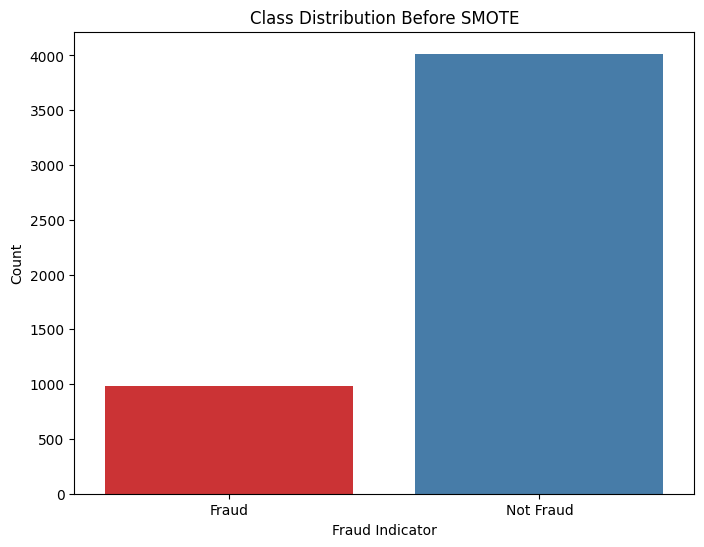

In [ ]:
# Plot class distribution before SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette='Set1')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

In [ ]:
# Handling imbalanced classes with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

<ipython-input-32-228ef25cc121>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='Set2')


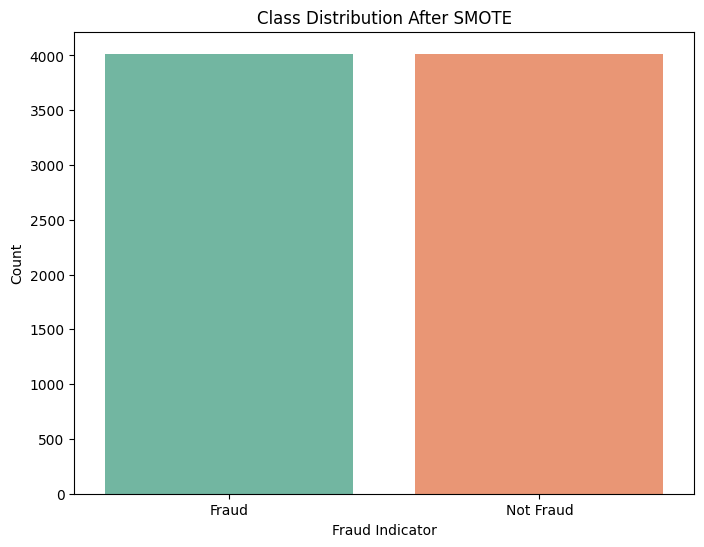

In [ ]:
# Plot class distribution after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled, palette='Set2')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

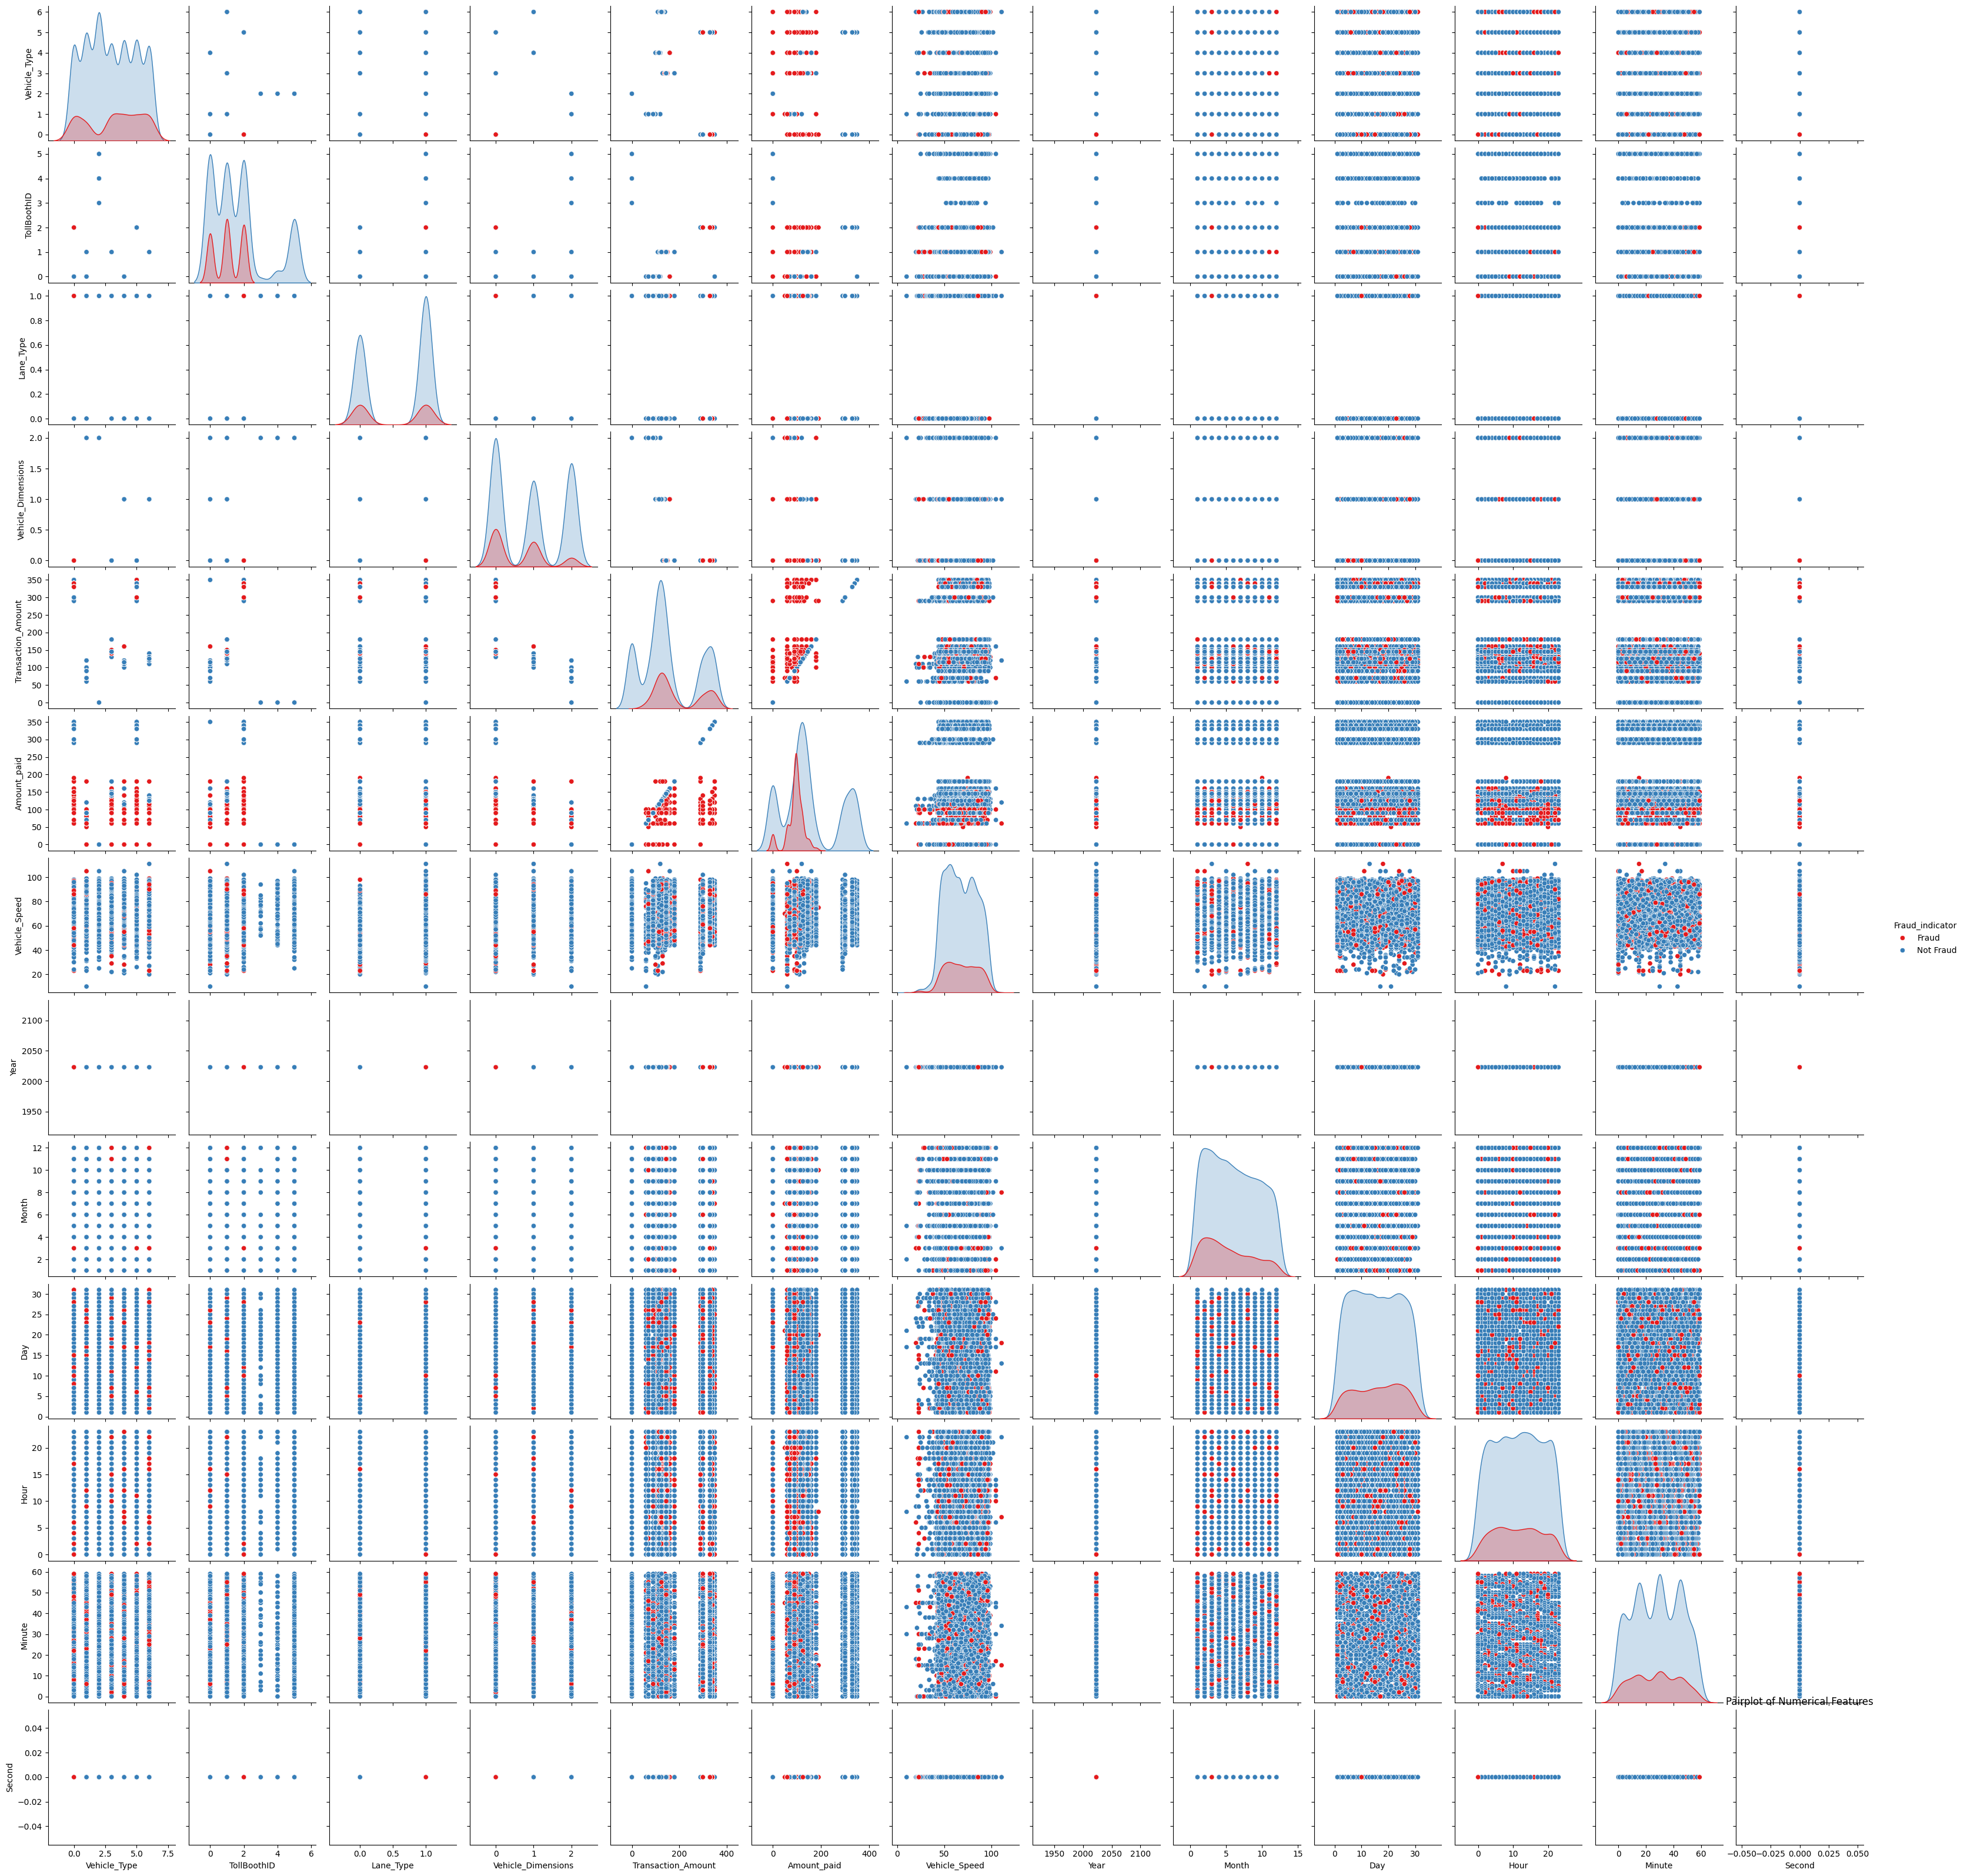

In [ ]:
# Visualize pairplot and correlation heatmap
sns.pairplot(data, hue='Fraud_indicator', palette='Set1')
plt.title('Pairplot of Numerical Features')
plt.show()

<ipython-input-38-919dc320de9d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


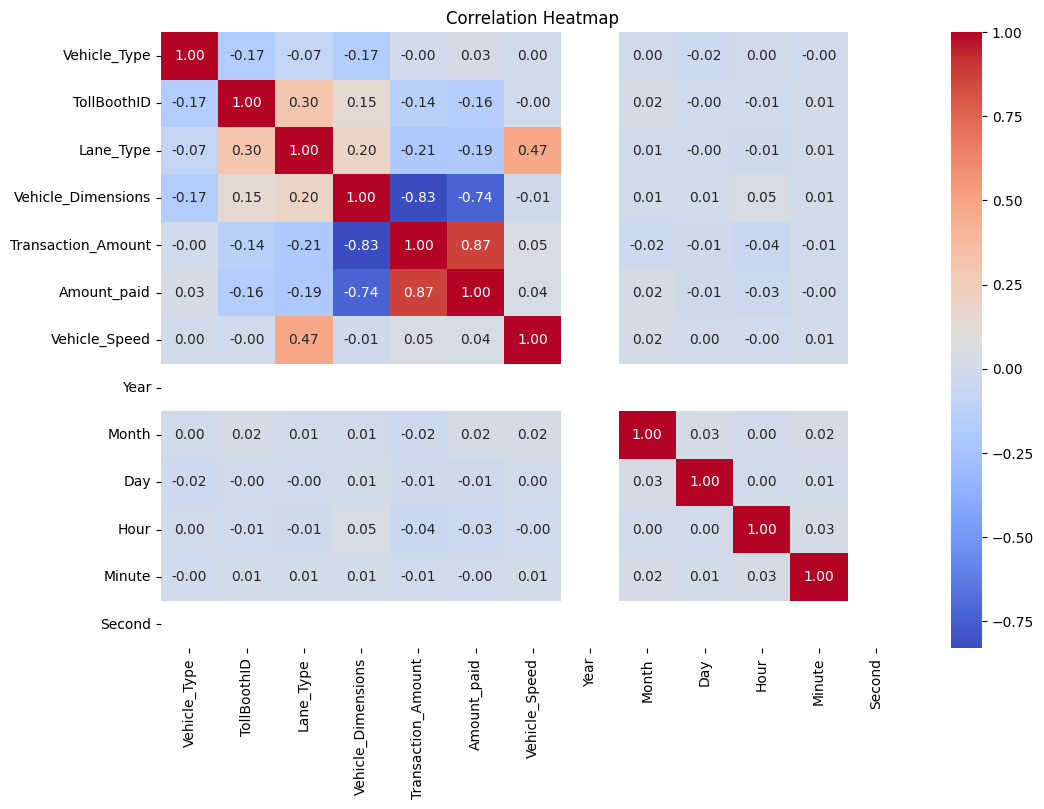

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-39-b47806c86c76>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fraud_indicator', y='Vehicle_Speed', data=data, palette='viridis')
<ipython-input-39-b47806c86c76>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=data, palette='viridis')
<ipython-input-39-b47806c86c76>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fraud_indicator', y='Amount_paid', data=data, palette='viridis')
<ipython-input-39-b47806c86c76>:16: FutureWarning: 

Passing `palette` without assigning `

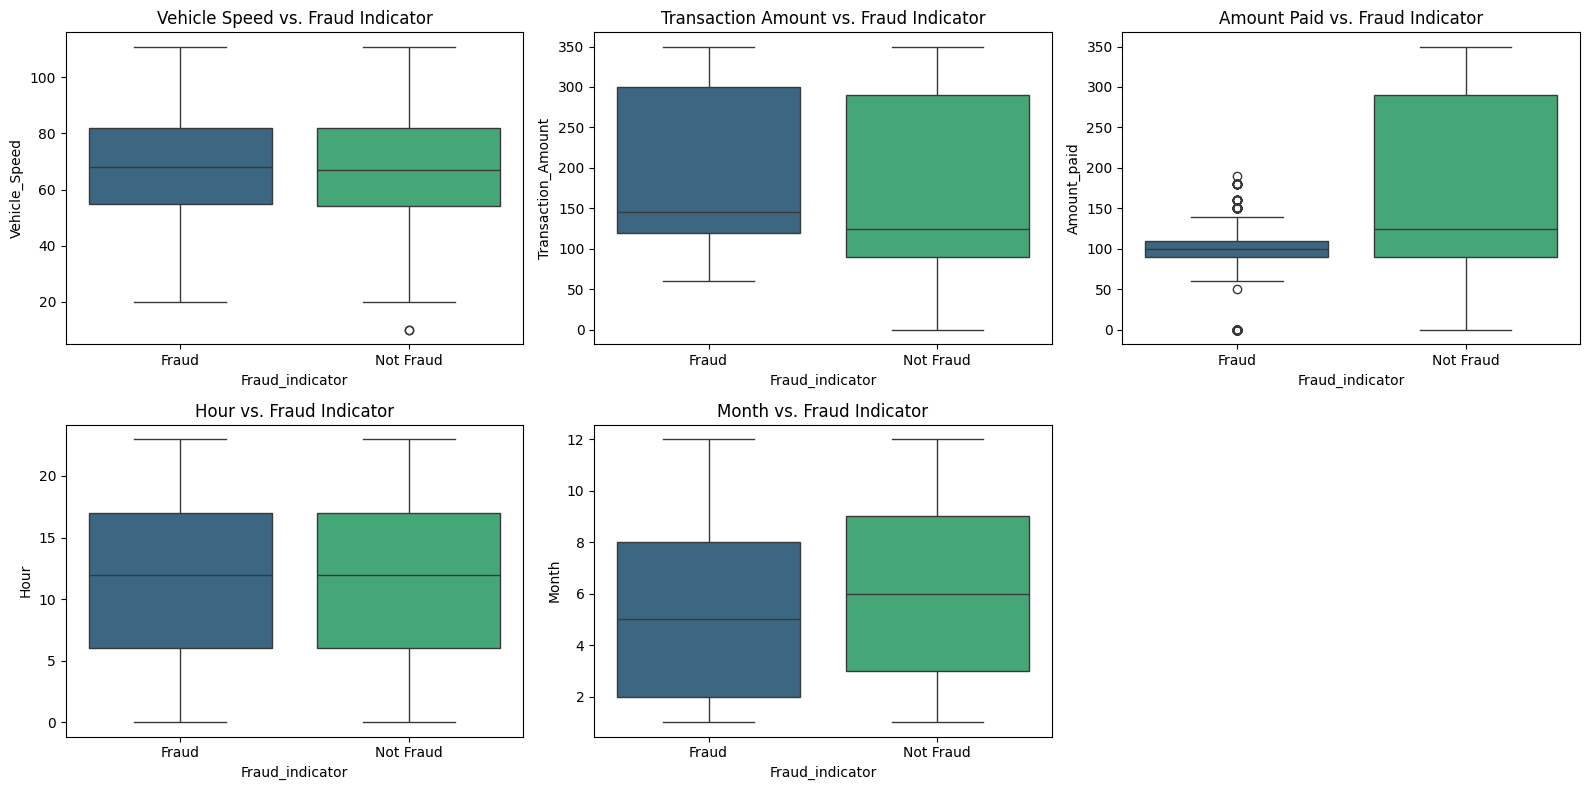

In [ ]:
# Box plots for numerical features
plt.figure(figsize=(16, 8))
plt.subplot(2, 3, 1)
sns.boxplot(x='Fraud_indicator', y='Vehicle_Speed', data=data, palette='viridis')
plt.title('Vehicle Speed vs. Fraud Indicator')

plt.subplot(2, 3, 2)
sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=data, palette='viridis')
plt.title('Transaction Amount vs. Fraud Indicator')

plt.subplot(2, 3, 3)
sns.boxplot(x='Fraud_indicator', y='Amount_paid', data=data, palette='viridis')
plt.title('Amount Paid vs. Fraud Indicator')

plt.subplot(2, 3, 4)
sns.boxplot(x='Fraud_indicator', y='Hour', data=data, palette='viridis')
plt.title('Hour vs. Fraud Indicator')

plt.subplot(2, 3, 5)
sns.boxplot(x='Fraud_indicator', y='Month', data=data, palette='viridis')
plt.title('Month vs. Fraud Indicator')

plt.tight_layout()
plt.show()

**TRAIN TEST SPLIT**

In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Dimensionality reduction with PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Build an Extra Trees classifier
et_clf = ExtraTreesClassifier(random_state=42)

# Hyperparameter tuning with GridSearchCV for Extra Trees
et_param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

et_grid_search = GridSearchCV(et_clf, et_param_grid, cv=5)
et_grid_search.fit(X_train_pca, y_train)

et_best_params = et_grid_search.best_params_
print(f'Best Hyperparameters for Extra Trees: {et_best_params}')

Best Hyperparameters for Extra Trees: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
# Train the Extra Trees classifier on the training data
et_clf = ExtraTreesClassifier(**et_best_params, random_state=42)
et_clf.fit(X_train_pca, y_train)

ExtraTreesClassifier(min_samples_split=5, n_estimators=50, random_state=42)

In [ ]:
# Make predictions on the testing data
et_y_pred = et_clf.predict(X_test_pca)

In [ ]:
# Evaluate the Extra Trees model
et_accuracy = accuracy_score(y_test, et_y_pred)
et_conf_matrix = confusion_matrix(y_test, et_y_pred)
et_class_report = classification_report(y_test, et_y_pred)

print(f'Extra Trees Accuracy: {et_accuracy}')
print(f'Extra Trees Confusion Matrix:\n{et_conf_matrix}')
print(f'Extra Trees Classification Report:\n{et_class_report}')

Extra Trees Accuracy: 0.9993777224642191
Extra Trees Confusion Matrix:
[[794   1]
 [  0 812]]
Extra Trees Classification Report:
              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00       795
   Not Fraud       1.00      1.00      1.00       812

    accuracy                           1.00      1607
   macro avg       1.00      1.00      1.00      1607
weighted avg       1.00      1.00      1.00      1607



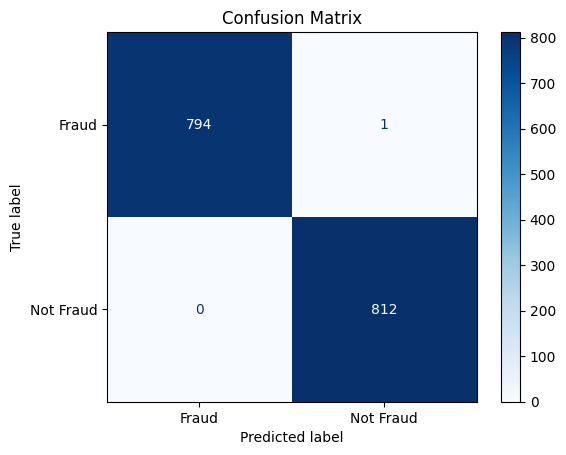

In [ ]:
# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=et_conf_matrix, display_labels=['Fraud','Not Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Cross-validation for Extra Trees
et_cv_scores = cross_val_score(et_clf, X_resampled, y_resampled, cv=5)
print(f'Extra Trees Cross-Validation Scores: {et_cv_scores}')

Extra Trees Cross-Validation Scores: [0.97261979 0.9943995  0.99439601 0.99688667 1.        ]
